In [1]:
import os
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# scrfd for detection bbox
from totalface.model_zoo.model_common import load_onnx
from totalface.model_zoo.get_models import get_detection_model
from totalface.face.get_result import get_detection
from totalface.utils.util_warp import face_align
from totalface.data.constant import LMARK_REF_ARC

/usr/local/lib/python3.8/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.23ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/pkg_resources/_vendor/packaging/version.py:111: DeprecationWarning: Creating a LegacyVersion has been deprecated and will be removed in the next major release
  warnings.warn(


In [3]:
from tqdm import tqdm

In [4]:
detection_name = "scrfd"
detection_path = "detection/scrfd_10g_bnkps.onnx"

# Set parameters
detection_thresh = 0.5
detection_height_min=0 

# if load multiple trt, load_multi=True, default False
detection_model = get_detection_model(detection_name,detection_path,load_multi=False)

providers: ['CUDAExecutionProvider']
scrfd onnx loaded


In [7]:
image_base = "celebA/Img/img_celeba/"
csv_path = "celebA/csv/230720/check_celebA.csv"
df = pd.read_csv(csv_path)

In [6]:
df

,filename,No_Beard,Goatee,Mustache,Eyeglasses,Wearing_Lipstick,Wearing_Hat,Wearing_Earrings,Wearing_Necklace,Wearing_Necktie
0,000001.jpg,1,0,0,0,1,0,1,0,0
1,000002.jpg,1,0,0,0,0,0,0,0,0
2,000003.jpg,1,0,0,0,0,0,0,0,0
3,000004.jpg,1,0,0,0,1,0,1,1,0
4,000005.jpg,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
202594,202595.jpg,1,0,0,0,1,0,0,0,0
202595,202596.jpg,1,0,0,0,0,0,0,0,0
202596,202597.jpg,1,0,0,1,0,0,0,0,0
202597,202598.jpg,1,0,0,0,1,0,1,0,0


In [8]:
for val in df.values:
    img_path = os.path.join(image_base,val[0])
    break

In [9]:
img = cv2.cvtColor(cv2.imread(img_path),cv2.COLOR_BGR2RGB)

In [10]:
LMARK_REF_ARC224 = LMARK_REF_ARC*2

In [11]:
faces = get_detection(detection_name,detection_model,img,thresh=detection_thresh,height_min=detection_height_min,input_size=(640,640))

In [12]:
if len(faces)<1:
    print("not detect")
elif len(faces)>1:
    for face in faces:
        if face.max_flag:
            break
else:
    face = faces[0]

In [13]:
aimg = face_align(img,LMARK_REF_ARC224,face.land5,224)

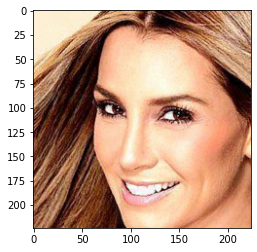

In [14]:
plt.imshow(aimg)